In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the output directly below corresponding cells
%matplotlib inline

# Apply the default theme
sns.set_theme()

In [2]:
# Read a CSV file into a DataFrame
df = pd.read_csv('top100_kdrama.csv')

# Return the first rows of a DataFrame
df.head()

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",5/14/2021,NaN,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",11/18/2022,NaN,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",6/17/2021,9/16/2021,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
3,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, S...",Although Baek Hee Sung is hiding a dark secret...,16,31,9.1,16,70,"94,811",7/29/2020,9/23/2020,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ..."
4,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, ...",The stories of people going through their days...,17,51,9.1,12,90,"81,568",3/12/2020,5/28/2020,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


In [3]:
# Preparing a DataFrame

# Return the dtypes in the DataFrame
df.dtypes

ID              int64
Title          object
Genre          object
Tags           object
Synopsis       object
Rank            int64
Popularity      int64
Score         float64
Episodes        int64
Duration        int64
Watchers       object
Start_date     object
End_date       object
Day_aired      object
Main Role      object
dtype: object

In [4]:
# Change the dtypes
df['Watchers'] = df['Watchers'].apply(lambda x: int(x.replace(",", "")))
df['Start_date'] = pd.to_datetime(df['Start_date'])
df['End_date'] = pd.to_datetime(df['End_date'])

# Return the dtypes in the DataFrame again
df.dtypes

ID                     int64
Title                 object
Genre                 object
Tags                  object
Synopsis              object
Rank                   int64
Popularity             int64
Score                float64
Episodes               int64
Duration               int64
Watchers               int64
Start_date    datetime64[ns]
End_date      datetime64[ns]
Day_aired             object
Main Role             object
dtype: object

In [5]:
# Check if there are any missing values
df.isna().sum()

ID             0
Title          0
Genre          0
Tags           0
Synopsis       0
Rank           0
Popularity     0
Score          0
Episodes       0
Duration       0
Watchers       0
Start_date     0
End_date      12
Day_aired      0
Main Role      0
dtype: int64

In [6]:
# Return the rows with missing data
df[df['End_date'].isna()]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,64103,2021-05-14,NaT,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,32415,2022-11-18,NaT,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
8,9,The Glory Part 2,"Thriller, Drama, Melodrama","Strong Female Lead, Revenge, Suspense, Brief N...",Moon Dong Eun's silent fury against those stud...,27,573,9.0,8,55,19698,2023-03-10,NaT,Friday,"Song Hye Kyo, Im Ji Yeon, Park Sung Hoon, Lee ..."
20,21,The Glory,"Thriller, Drama, Melodrama","Revenge, School Bullying, School Violence, Str...",A high school student dreams of becoming an ar...,68,202,8.9,8,50,40456,2022-12-30,NaT,Friday,"Song Hye Kyo, Im Ji Yeon, Park Sung Hoon, Lee ..."
21,22,Kingdom Season 2,"Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...","Following the events in season one, waves of t...",70,249,8.9,6,45,36037,2020-03-13,NaT,Friday,"Joo Ji Hoon, Kim Sung Gyu, Bae Doo Na"
33,34,D.P.,"Action, Military, Drama","Military Abuse, Violence, Bromance, Desertion,...",Private soldier Jun Ho is a confused youth who...,120,207,8.8,6,50,39966,2021-08-27,NaT,Friday,"Jung Hae In, Kim Sung Kyun, Koo Kyo Hwan, Son ..."
34,35,Kingdom,"Thriller, Historical, Horror, Political","Joseon Dynasty, Adapted From A Webtoon, Power ...",No sooner does the Joseon King succumb to smal...,129,113,8.8,6,51,58560,2019-01-25,NaT,Friday,"Joo Ji Hoon, Bae Doo Na, Ryu Seung Ryong, Kim ..."
57,58,Sweet Home,"Action, Horror, Drama, Sci-Fi","Monsters, Gore, Survival, Character Developmen...",Following the death of his family in an accide...,201,63,8.7,10,52,75786,2020-12-18,NaT,Friday,"Song Kang, Lee Si Young, Kim Nam Hee, Park Gyu..."
65,66,My Name,"Action, Thriller, Mystery, Crime","Blood, Revenge, Lying, Murder, Double Identity...","Following her father's murder, a revenge-drive...",221,87,8.7,8,50,65658,2021-10-15,NaT,Friday,"Han So Hee, Ahn Bo Hyun, Park Hee Soon"
71,72,Love to Hate You,"Comedy, Law, Romance","Badass Female Lead, Enemies To Lovers, Social ...",Yeo Mi Ran is a rookie attorney at Gilmu Law F...,241,471,8.7,10,52,22953,2023-02-10,NaT,Friday,"Kim Ok Bin, Kim Ji Hoon, Yoo Teo, Go Won Hee"


In [7]:
# Create a copy
df_copy = df.copy()

# Create a function that imputes the End_date data
def impute_end_date(df_copy):
    
    # Change Start_date column dtype to datetime64
    df_copy['Start_date'] = pd.to_datetime(df_copy['Start_date'])
    
    # Iterate over the rows of the DataFrame
    for i, row in df_copy[df_copy['End_date'].isna()].iterrows():
        
        # Impute the End_date data
        df_copy.at[i, 'End_date'] = pd.to_datetime(row['Start_date']) + pd.DateOffset(days=7 * (row['Episodes'] - 1))
    
    # Format the End_date column
    df_copy['End_date'] = pd.to_datetime(df_copy['End_date'])
    
    return df_copy

# Call a function
df = impute_end_date(df_copy)

# Check if there are any missing values again
df.isna().sum()

ID            0
Title         0
Genre         0
Tags          0
Synopsis      0
Rank          0
Popularity    0
Score         0
Episodes      0
Duration      0
Watchers      0
Start_date    0
End_date      0
Day_aired     0
Main Role     0
dtype: int64

In [8]:
# Change the names of the columns
df.rename(columns={'Start_date': 'Start Date', 'End_date': 'End Date', 'Day_aired': 'Day Aired'}, inplace=True)

# Return the first rows of an edited DataFrame
df.head()

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,64103,2021-05-14,2021-07-16,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,32415,2022-11-18,2023-01-06,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,43574,2021-06-17,2021-09-16,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
3,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, S...",Although Baek Hee Sung is hiding a dark secret...,16,31,9.1,16,70,94811,2020-07-29,2020-09-23,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ..."
4,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, ...",The stories of people going through their days...,17,51,9.1,12,90,81568,2020-03-12,2020-05-28,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


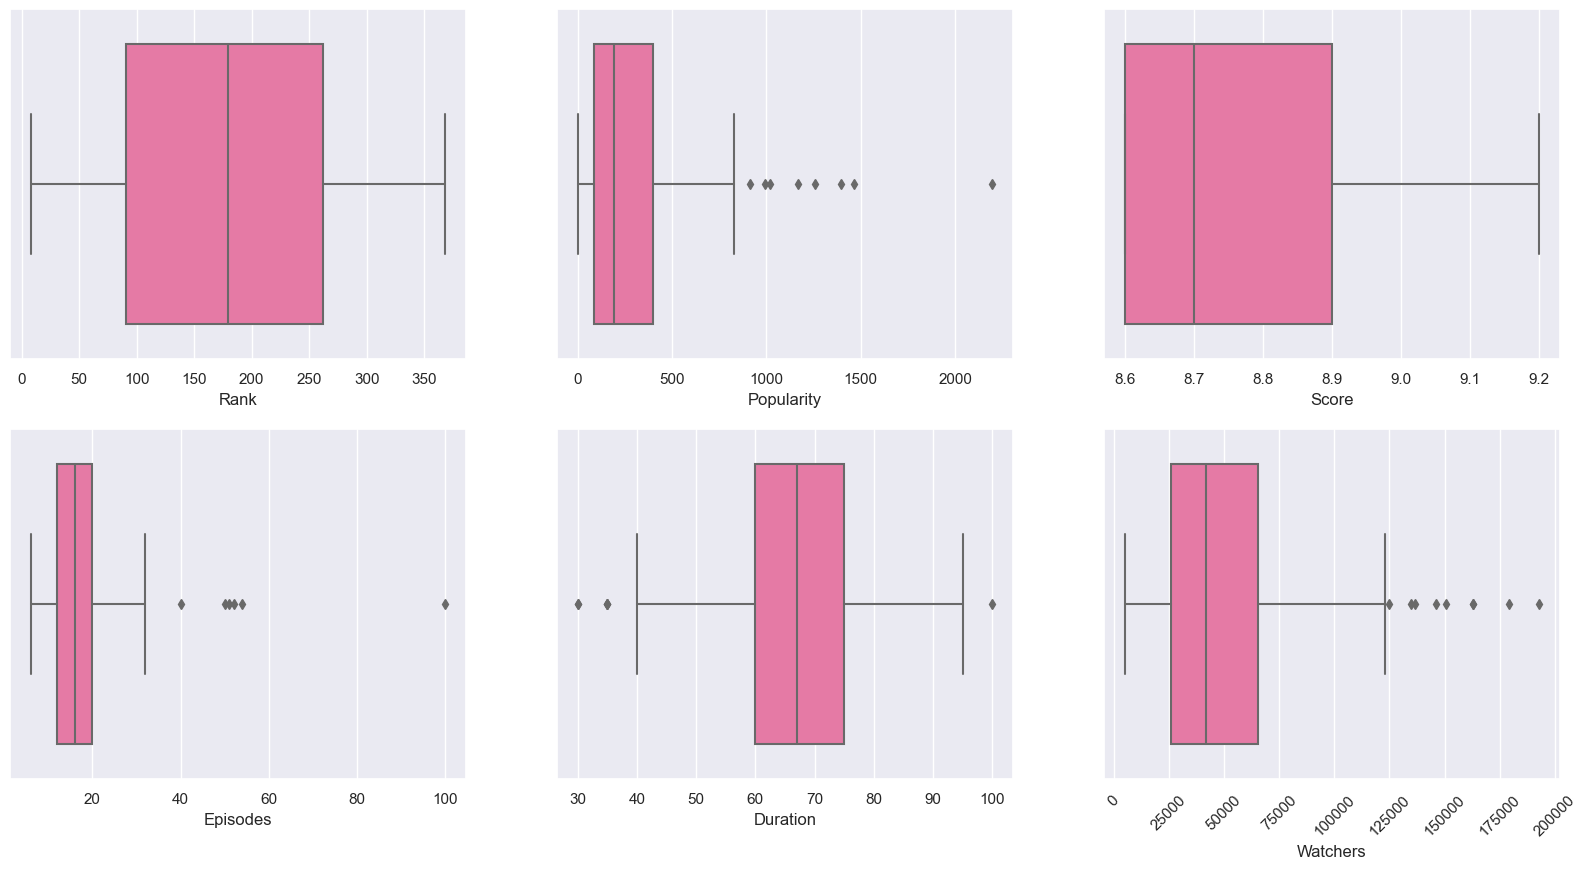

In [9]:
# Detecting outliers

# Create boxplots for all numerical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x='Rank', data=df, ax=axes[0,0], color="#f768a1")
sns.boxplot(x='Popularity', data=df, ax=axes[0,1], color="#f768a1")
sns.boxplot(x='Score', data=df, ax=axes[0,2], color="#f768a1")
sns.boxplot(x='Episodes', data=df, ax=axes[1,0], color="#f768a1")
sns.boxplot(x='Duration', data=df, ax=axes[1,1], color="#f768a1")
sns.boxplot(x='Watchers', data=df, ax=axes[1,2], color="#f768a1")
plt.xticks(rotation=45)

axes[0, 0].set(ylabel='')
axes[0, 1].set(ylabel='')
axes[0, 2].set(ylabel='')
axes[1, 0].set(ylabel='')
axes[1, 1].set(ylabel='')
axes[1, 2].set(ylabel='')

plt.show()

In [10]:
# Analyze the Popularity outliers
df[df['Popularity'] > 900]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
44,45,Missing: The Other Side Season 2,"Thriller, Mystery, Supernatural","Village Setting, Swindler Male Lead, Cold Case...",3 Gongdan is a village where missing deceased ...,163,2197,8.7,14,60,5034,2022-12-19,2023-01-31,"Monday, Tuesday","Go Soo, Ahn So Hee, Lee Jung Eun, Heo Joon Ho,..."
47,48,Dear My Friends,"Life, Drama, Melodrama","Life Lesson, Mother-Daughter Relationship, Mot...",Park Wan is a translator who is constantly pul...,173,1017,8.7,16,70,11811,2016-05-13,2016-07-02,"Friday, Saturday","Go Hyun Jung, Na Moon Hee, Park Won Sook, Joo ..."
61,62,Partners for Justice Season 2,"Mystery, Law, Drama, Medical","Forensic Science, Forensic Medical Examiner Ma...","In crime and in life, all contact leaves a tra...",213,1394,8.7,32,35,8549,2019-06-03,2019-07-29,"Monday, Tuesday","Jung Jae Young, Oh Man Suk, Jung Yoo Mi, Noh M..."
73,74,The King of Pigs,"Thriller, Mystery, Drama","School Bullying, Detective Male Lead, School V...",Two friends meet up and recall their experienc...,256,1463,8.6,12,55,8203,2022-03-18,2022-04-22,Friday,"Kim Dong Wook, Chae Jung An, Kim Sung Gyu"
81,82,The First Responders,"Action, Thriller, Mystery, Drama","Teamwork, Firefighter Male Lead, Investigation...",Follow the joint operations of a police force ...,305,1167,8.6,12,60,10203,2022-11-12,2022-12-30,"Friday, Saturday","Kim Rae Won, Gong Seung Yeon, Son Ho Jun"
88,89,Once Again,"Comedy, Romance, Life, Drama","Multiple Couples, Multiple Mains, Love/Hate Re...","""Once Again"" is the story of the eventful Song...",329,994,8.6,100,35,12135,2020-03-28,2020-09-13,"Saturday, Sunday","Chun Ho Jin, Lee Jung Eun, Lee Min Jung, Oh Yo..."
91,92,Money Heist: Korea - Joint Economic Area - Par...,"Action, Thriller, Mystery, Crime","Heist, Hostage Situation, Suspense, Multiple M...",Thieves overtake the mint of a unified Korea. ...,340,1260,8.6,6,60,9505,2022-12-09,2023-01-13,Friday,"Yoo Ji Tae, Jeon Jong Seo, Kim Ji Hoon, Lee Hy..."
97,98,Designated Survivor: 60 Days,"Thriller, Mystery, Drama, Political","Blue House, Power Struggle, Conspiracy, Lying,...",Park Moo Jin is a former professor of chemistr...,366,914,8.6,16,74,13475,2019-07-01,2019-08-20,"Monday, Tuesday","Ji Jin Hee, Kang Han Na, Lee Joon Hyuk, Son Se..."


In [11]:
# Analyze the Episodes outliers
df[df['Episodes'] > 40]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
37,38,Six Flying Dragons,"Action, Historical, Drama, Political","Revolution, Power Struggle, Political Intrigue...","A fictional, historical drama about the ambiti...",142,490,8.8,50,60,22241,2015-10-05,2016-03-22,"Monday, Tuesday","Yoo Ah In, Shin Se Kyung, Yoon Kyun Sang, Kim ..."
74,75,Jewel in the Palace,"Food, Historical, Romance, Medical","Strong Female Lead, Cooking, Royal Rules And E...",About 500 years ago during the time of Chosun ...,260,724,8.6,54,65,16545,2003-09-15,2004-03-23,"Monday, Tuesday","Lee Young Ae, Hong Ri Na, Ji Jin Hee, Im Ho"
88,89,Once Again,"Comedy, Romance, Life, Drama","Multiple Couples, Multiple Mains, Love/Hate Re...","""Once Again"" is the story of the eventful Song...",329,994,8.6,100,35,12135,2020-03-28,2020-09-13,"Saturday, Sunday","Chun Ho Jin, Lee Jung Eun, Lee Min Jung, Oh Yo..."
90,91,Empress Ki,"Historical, Romance, Melodrama, Political","Smart Female Lead, Strong Female Lead, Power S...",Genghis Khan built an empire that spanned vast...,338,229,8.6,51,65,38050,2013-10-28,2014-04-29,"Monday, Tuesday","Ha Ji Won, Joo Jin Mo, Ji Chang Wook, Baek Jin..."
93,94,My Father Is Strange,"Comedy, Romance, Drama","Family Secret, Eccentric Female Lead, Fake Inc...",This drama is about a family that lives on the...,344,372,8.6,52,66,27397,2017-03-04,2017-08-27,"Saturday, Sunday","Kim Yeong Cheol, Ryu Soo Young, Lee Joon, Kim ..."


In [12]:
# Find the mean number of episodes
np.mean(df['Episodes'])

18.08

In [13]:
# Analyze the Duration outliers
df[df['Duration'] < 35]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
53,54,While You Were Sleeping,"Mystery, Romance, Drama, Fantasy","Precognition, Nice Male Lead, Murder, Tragic P...",A young woman with bad premonition dreams meet...,190,11,8.7,32,30,136482,2017-09-27,2017-11-16,"Wednesday, Thursday","Bae Suzy, Jung Hae In, Lee Jong Suk, Lee Sang ..."
85,86,Children of Nobody,"Thriller, Mystery, Psychological, Drama","Trauma, Child Abuse, Smart Female Lead, Murder...",Cha Woo Kyung is a child counselor who works a...,316,788,8.6,32,30,15242,2018-11-21,2019-01-16,"Wednesday, Thursday","Kim Sun Ah, Nam Gyu Ri, Lee Yi Kyung, Cha Hak ..."


In [14]:
# Analyze the Duration outliers
df[df['Duration'] > 95]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,43574,2021-06-17,2021-09-16,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


In [15]:
# Analyze the Watchers outliers
df[df['Watchers'] > 125000]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start Date,End Date,Day Aired,Main Role
15,16,Crash Landing on You,"Military, Comedy, Romance, Political","North And South Korea, Strong Male Lead, Rich ...","After getting into a paragliding accident, Sou...",50,8,9.0,16,85,146358,2019-12-14,2020-02-16,"Sunday, Saturday","Hyun Bin, Seo Ji Hye, Son Ye Jin, Kim Jung Hyun"
18,19,It's Okay to Not Be Okay,"Psychological, Comedy, Romance, Drama","Possessive Female Lead, Independent Female Lea...",Moon Gang Tae is a community health worker at ...,60,7,8.9,16,75,150712,2020-06-20,2020-08-09,"Saturday, Sunday","Kim Soo Hyun, Oh Jung Se, Seo Yea Ji"
25,26,Healer,"Action, Thriller, Mystery, Romance","Double Identity, Hidden Identity, Smart Male L...",Seo Jung Hoo is a special kind of night courie...,91,14,8.9,20,60,125028,2014-12-08,2015-02-10,"Monday, Tuesday","Ji Chang Wook, Yoo Ji Tae, Park Min Young"
32,33,Goblin,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",Kim Shin was once an unbeatable general in Gor...,111,1,8.8,16,82,192967,2016-12-02,2017-01-21,"Friday, Saturday","Gong Yoo, Lee Dong Wook, Yook Sung Jae, Kim Go..."
35,36,Weightlifting Fairy Kim Bok Joo,"Comedy, Romance, Life, Sports","Weightlifting, Friends To Lovers, Strong Femal...",Bok Joo is a weightlifter who is pursuing her ...,133,3,8.8,16,60,162900,2016-11-16,2017-01-11,"Wednesday, Thursday","Lee Sung Kyung, Lee Jae Yoon, Nam Joo Hyuk, Ky..."
53,54,While You Were Sleeping,"Mystery, Romance, Drama, Fantasy","Precognition, Nice Male Lead, Murder, Tragic P...",A young woman with bad premonition dreams meet...,190,11,8.7,32,30,136482,2017-09-27,2017-11-16,"Wednesday, Thursday","Bae Suzy, Jung Hae In, Lee Jong Suk, Lee Sang ..."
68,69,Strong Woman Do Bong Soon,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...","Do Bong Soon is a petite, unemployed woman who...",225,2,8.7,16,67,179271,2017-02-24,2017-04-15,"Friday, Saturday","Park Bo Young, Kim Ji Soo, Park Hyung Sik"
77,78,Descendants of the Sun,"Action, Comedy, Romance, Melodrama","Hardworking Female Lead, Multiple Couples, Bro...",A love story that develops between a surgeon a...,286,4,8.6,16,60,162815,2016-02-24,2016-04-14,"Wednesday, Thursday","Song Joong Ki, Jin Goo, Song Hye Kyo, Kim Ji Won"
78,79,Hotel del Luna,"Horror, Comedy, Romance, Fantasy","Boss-Employee Relationship, Strong Female Lead...",Nestled deep in the heart of Seoul’s thriving ...,287,13,8.6,16,80,134694,2019-07-13,2019-09-01,"Saturday, Sunday","IU, Yeo Jin Goo"


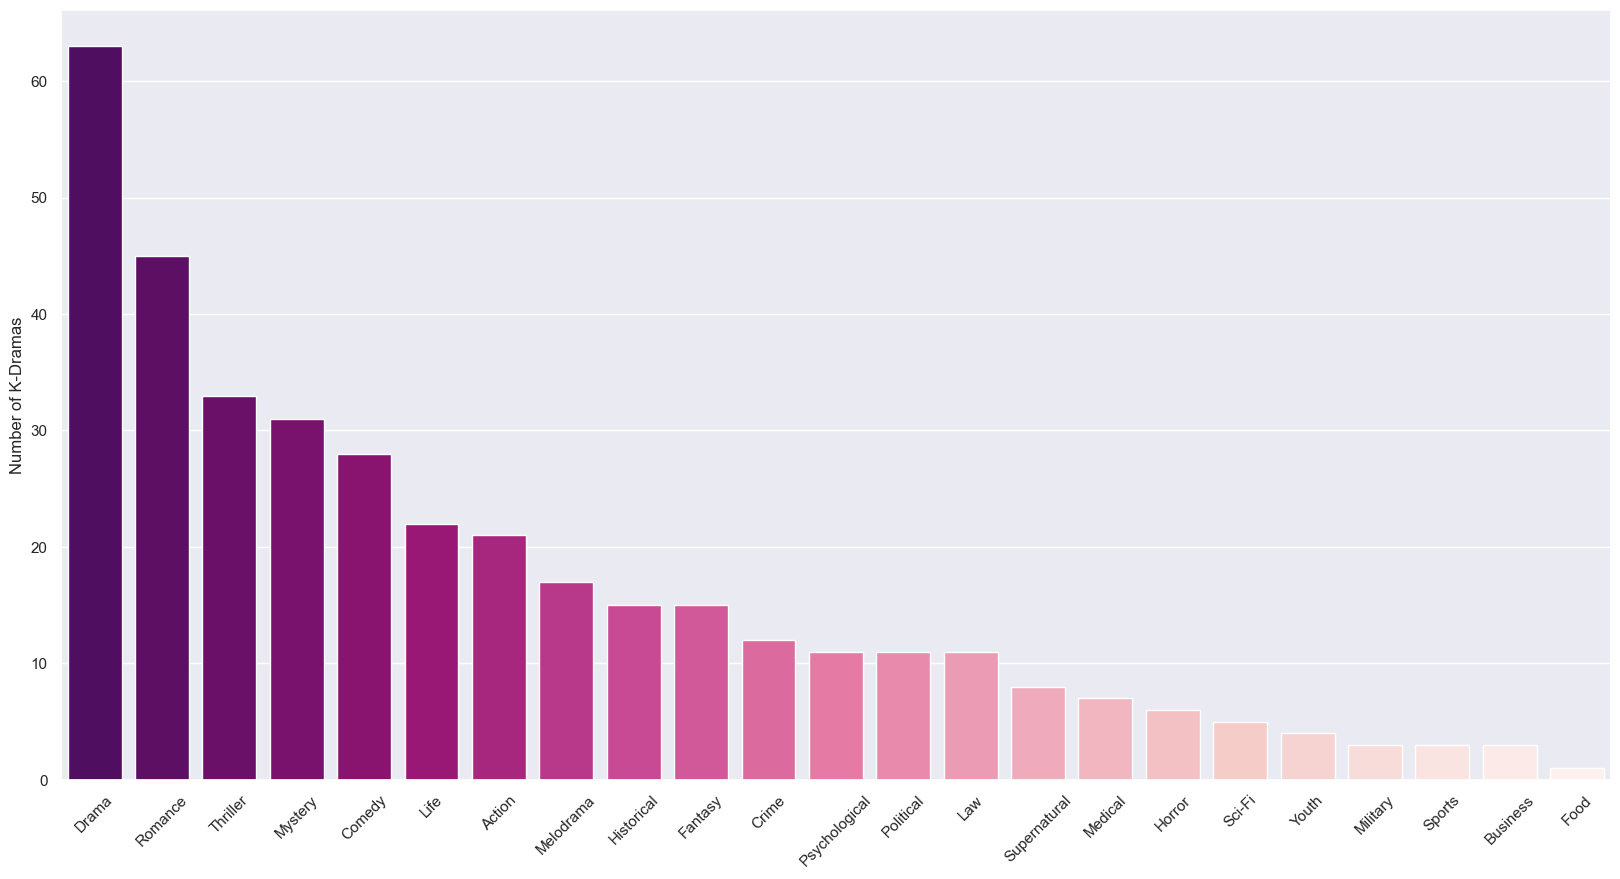

In [16]:
# Detecting the most popular genres

# Create a genres list
genres_list = []
for genres in df['Genre'].to_list():
    genres = genres.strip().split(", ")
    for genre in genres:
        genres_list.append(genre)
genres_list = sorted(genres_list, key=genres_list.count, reverse=True)

# Visualize
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(x=genres_list, palette="RdPu_r")
plt.ylabel('Number of K-Dramas')
plt.xticks(rotation=45)

plt.show()

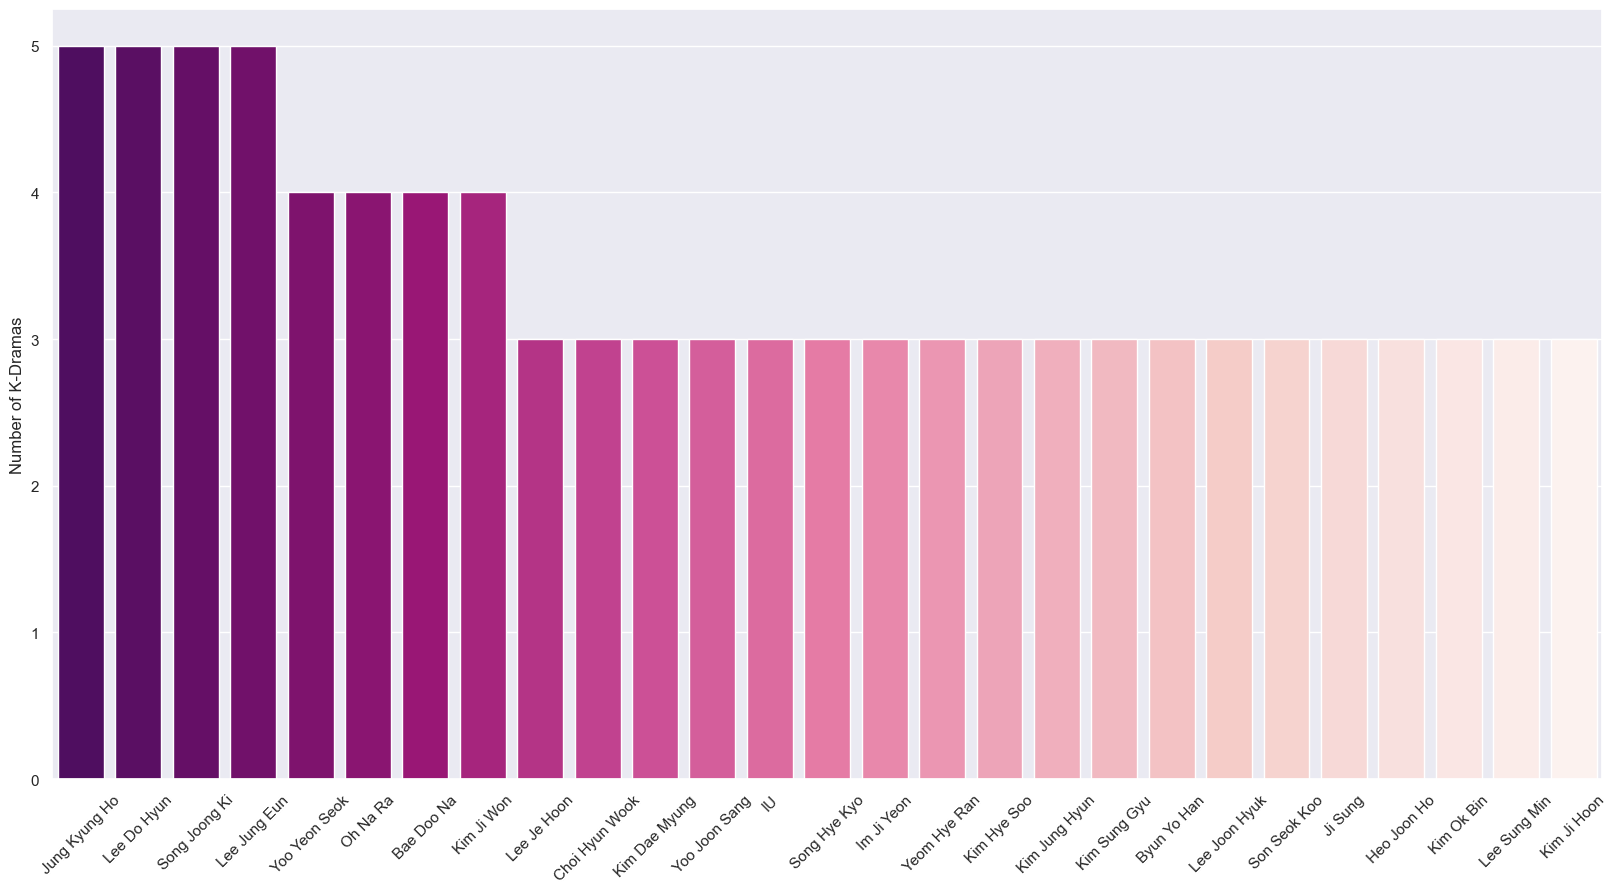

In [17]:
# Detecting the most popular actors

# Create an actors list
actors_list = []
for actors in df['Main Role'].to_list():
    actors = actors.strip().split(", ")
    for actor in actors:
        actors_list.append(actor)
actors_list = sorted(actors_list, key=actors_list.count, reverse=True)
actors_list = [i for i in actors_list if actors_list.count(i) > 2]

# Visualize
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(x=actors_list, palette="RdPu_r")
plt.ylabel('Number of K-Dramas')
plt.xticks(rotation=45)

plt.show()

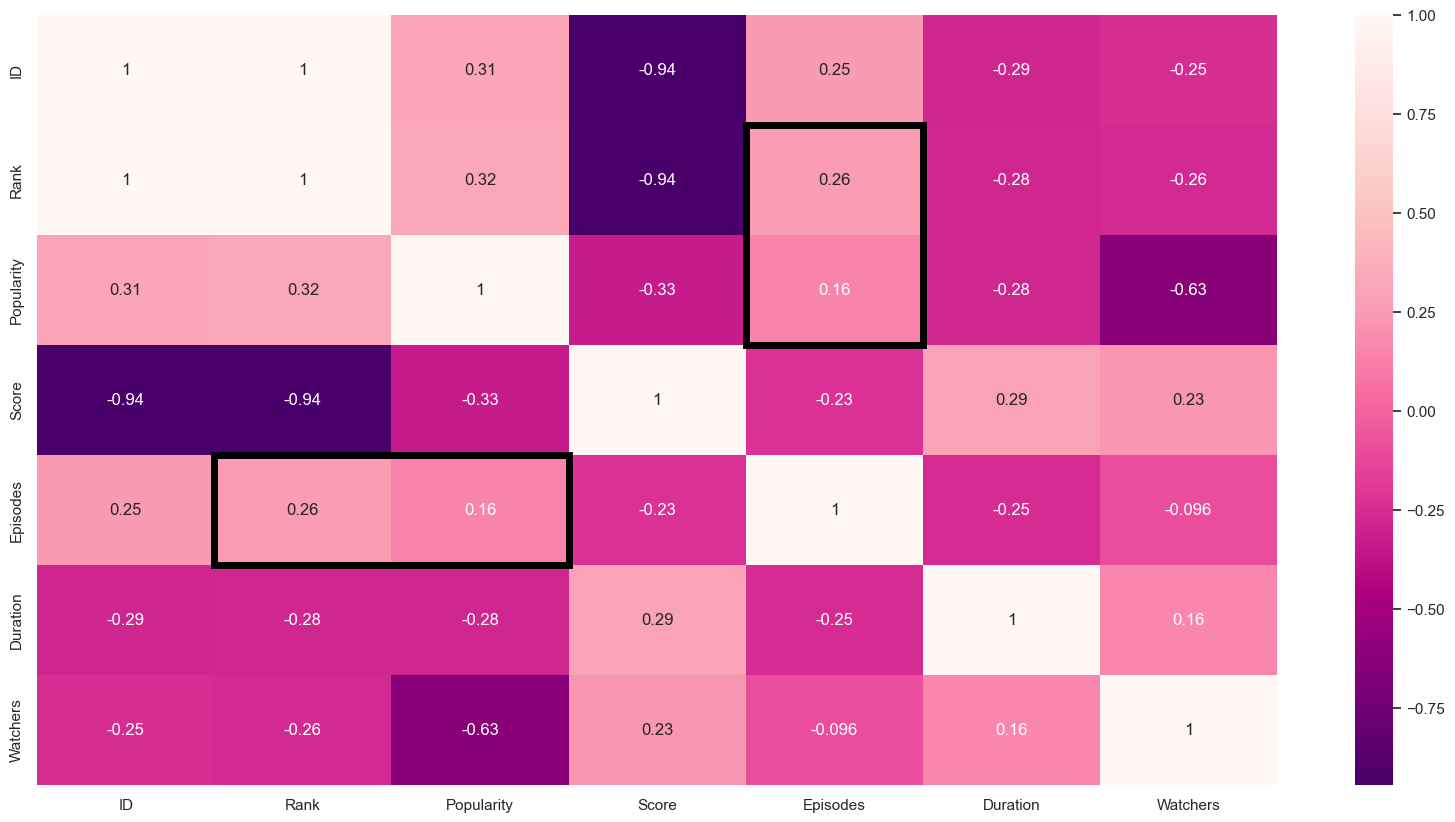

In [18]:
# Finding out if there is a correlation between the number of episodes and the ranking

# Create a heatmap
matrix = df.corr(numeric_only=True)
episodes_heatmap = sns.heatmap(matrix, annot=True, cmap="RdPu_r")

# Highlight specific elements of a heatmap
labels = ['ID', 'Rank', 'Popularity', 'Score', 'Episodes', 'Duration', 'Watchers']
N = len(labels)
selected_label = 'Episodes'
selected_index = labels.index(selected_label)
x, y, w, h = 1, selected_index, N - 5, 1
for i in range(2):
    episodes_heatmap.add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor="black", lw=5, clip_on=False))
    x, y = y, x
    w, h = h, w

plt.show()